In [147]:
# this is necessary to be able to import modules from the parent dir
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

In [385]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from colag.colag import hamming_distance, parameters

plt.rcParams['figure.figsize'] = 15, 5

In [164]:
param_nums = ['p{}'.format(p+1) for p in range(13)]

In [150]:
columns = ['target', 'n', 'num_sents', 'learned_lang', 'learned_params']
columns += param_nums
columns += ['empty', 'runtime']

williamfn = '../data/yang_rewrite/OUTDATA_REL20180217-135950.csv'
williamvl = pd.read_csv(williamfn, skiprows=[0], header=None).reset_index(drop=True)
williamvl.columns = columns
williamvl.head(1)

,target,n,num_sents,learned_lang,learned_params,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,empty,runtime
0,611,0,50000,35,'0000000100011,0.000096,3.297047e-07,0.000811,0.632259,0.005492,0.000021,0.51829,0.848335,0.00001,0.003794,0.019531,0.587129,0.996586,NaN,0:00:00.354175


In [151]:
columns = ['learner', 'target', 'n', 'num_sents', 'learned_lang']
columns += ['p{}'.format(p+1) for p in range(13)]
columns += ['empty', 'runtime']
paulvl = pd.read_csv('../data/vl-comparison.txt', delimiter='\t', index_col=None, header=None)
paulvl.reset_index(drop=True)
paulvl.columns = columns
paulvl.head(1)

,learner,target,n,num_sents,learned_lang,p1,p2,p3,p4,p5,p6,p7,p8,p9,p10,p11,p12,p13,empty,runtime
0,RewardOnlyLearner,611,0,50000,35,0.000143,2.900245e-07,0.000785,0.439899,0.000038,0.001489,0.520141,0.85899,0.000143,0.00078,0.017504,0.767892,0.995462,NaN,0:00:00.207149


# Does the new VL implementation match the old?

In [152]:
paul_reward_only = paulvl[paulvl.learner.eq('RewardOnlyLearner')]
william_reward_only = williamvl

# narrow to common columns
paul_reward_only = paul_reward_only[[c for c in paul_reward_only.columns 
                                     if c in william_reward_only.columns]]
william_reward_only = william_reward_only[[c for c in william_reward_only.columns 
                                           if c in paul_reward_only.columns]]
paul_reward_only['source'] = 'paul'
william_reward_only['source'] = 'william'
df = pd.concat([paul_reward_only, william_reward_only])
df = df.reset_index(drop=True)

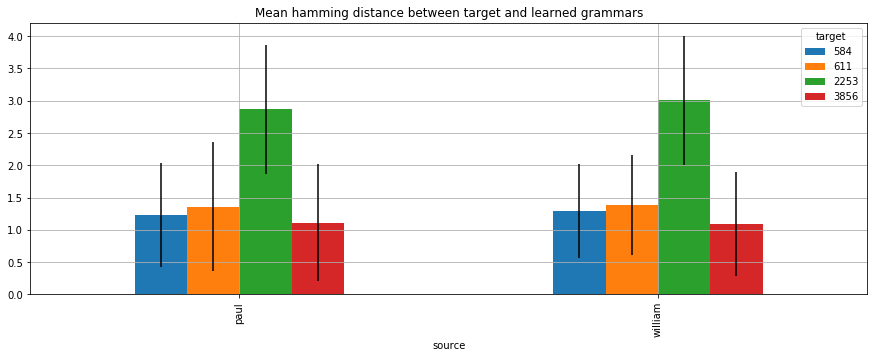

In [384]:
df['distance'] = df.apply(lambda x: hamming_distance(x.target, x.learned_lang), axis=1)
(
    df.groupby(['source', 'target'])
    .distance.agg(['mean', 'std'])
    .unstack()
    .plot.bar(y='mean', yerr='std', grid=True, title='Mean hamming distance between target and learned grammars')
);

# Comparing trigger weight vectors between paul & william VL

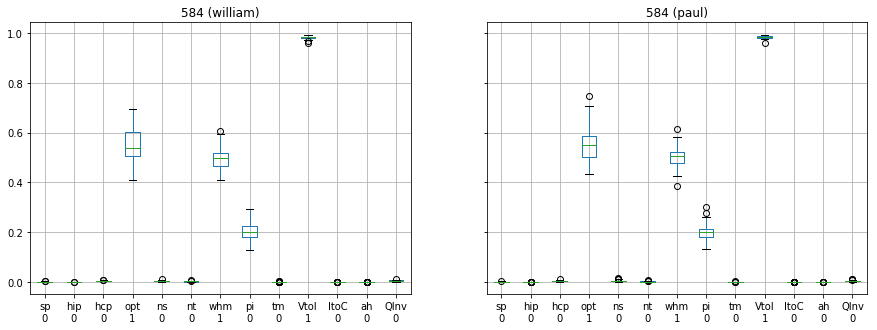

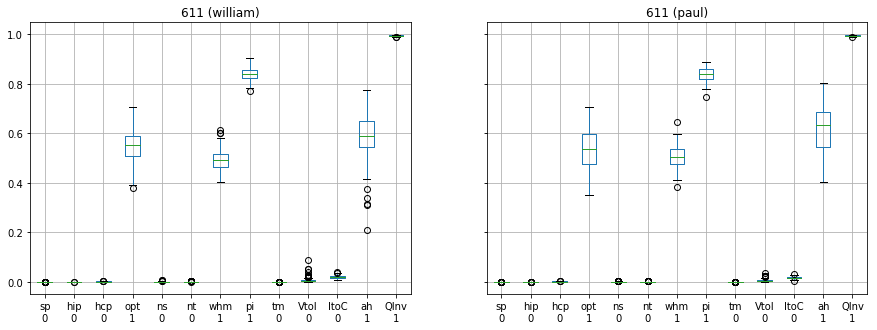

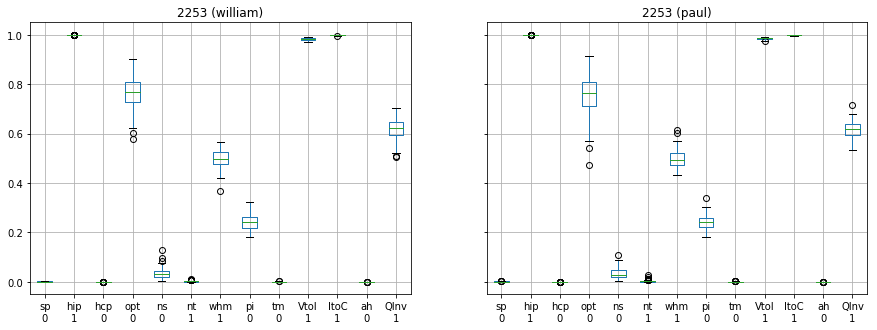

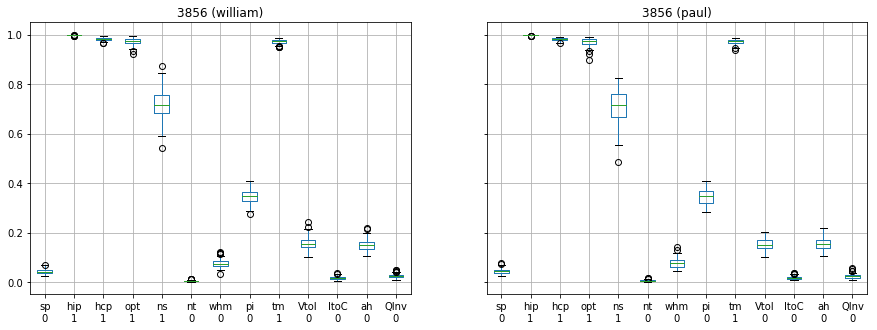

In [383]:
for key, group in df.groupby(['target']).groups.items():
    fig, (ax, ax2) = plt.subplots(ncols=2, sharey=True)

    data = df.loc[group][['source'] + param_nums]
    
    w = data[data.source.eq('william')]
    w.plot.box(title='{} (william)'.format(key), ax=ax, grid=True)
   
    p = data[data.source.eq('paul')]
    p.plot.box(ax=ax2, title='%s (paul)' % key, grid=True)
    
    for a in [ax, ax2]:
        a.set_xticklabels(['{}\n{}'.format(p, bit) 
                       for p, bit in zip(parameters,'{:013b}'.format(key))])